Great infos on how to deal with NetCDF4 files can be found under https://www.earthinversion.com/utilities/reading-NetCDF4-data-in-python/

In [1]:
import netCDF4 as nc

#PATH_HYCOM = '../data/HYCOM/GLBa0_expt_91.nc4'
#PATH_HYCOM = '../data/HYCOM/Water_July2014.nc4'
PATH_HYCOM = '../data/HYCOM/NOAA/HYCOM_traj_300234065619170.nc4'
ds = nc.Dataset(PATH_HYCOM)


In [109]:
import yaml
with open('configs_2/trace_ISMER_20141021_spot213_drift.yml', 'r') as f:
    config = yaml.safe_load(f)

ds = nc.Dataset(config['PATH_WATER'])
ds_wind = nc.Dataset(config['PATH_WIND'])
ds_stokes = nc.Dataset(config['PATH_WAVES'])

In [37]:
# obtenir le temps
time = ds.variables['time']
time[:].data


array([127200., 127203., 127206., 127209., 127212., 127215., 127218.,
       127221., 127224., 127227., 127230., 127233., 127236., 127239.,
       127242., 127245., 127248., 127251., 127254., 127257., 127263.,
       127266., 127269., 127272., 127275., 127278., 127281., 127284.,
       127287., 127290., 127293., 127296., 127299., 127302., 127305.,
       127308., 127311., 127314., 127317., 127320., 127323., 127326.,
       127329., 127332., 127335., 127338., 127341., 127344.])

In [38]:
from datetime import datetime, timedelta

dttme=datetime.strptime('2000-01-01 00:00:00', '%Y-%m-%d %H:%M:%S') + timedelta(hours=160104)
dttme2=datetime.strftime(dttme, "%Y-%m-%d %H:%M:%S")
print(dttme2)

2018-04-07 00:00:00


In [51]:
lat, lon = ds.variables['lat'], ds.variables['lon']

#print(lat[:])
print(lon[:])


[-63.03997803 -62.96002197 -62.88000488 -62.79998779 -62.7199707
 -62.64001465 -62.55999756 -62.47998047 -62.40002441 -62.32000732
 -62.23999023 -62.15997314 -62.08001709 -62.         -61.91998291
 -61.84002686 -61.76000977 -61.67999268 -61.59997559 -61.52001953
 -61.44000244 -61.35998535 -61.2800293  -61.20001221 -61.11999512
 -61.03997803 -60.96002197 -60.88000488 -60.79998779 -60.7199707
 -60.64001465 -60.55999756 -60.47998047 -60.40002441 -60.32000732
 -60.23999023 -60.15997314 -60.08001709 -60.         -59.91998291
 -59.84002686 -59.76000977 -59.67999268 -59.59997559 -59.52001953
 -59.44000244 -59.35998535 -59.2800293  -59.20001221 -59.11999512
 -59.03997803]


In [7]:
lontest = lon[:].data
minimum = min(lontest)
maximum = max(lontest)
print(minimum, maximum)

lontest = (lontest+180)%360-180
lontest

0.0 2.0


array([0.        , 0.07995605, 0.16003418, 0.23999023, 0.31994629,
       0.40002441, 0.47998047, 0.56005859, 0.64001465, 0.7199707 ,
       0.80004883, 0.88000488, 0.95996094, 1.04003906, 1.11999512,
       1.19995117, 1.2800293 , 1.35998535, 1.43994141, 1.52001953,
       1.59997559, 1.68005371, 1.76000977, 1.83996582, 1.92004395,
       2.        ])

In [8]:
(274+180)%360-180

-86

In [58]:
import numpy as np 

water_u = ds.variables['water_u']
water_u = water_u[:].data
water_v = ds.variables['water_v']
water_v = water_v[:].data

water_u = np.where(water_u < -10000, 0, water_u)
water_v = np.where(water_v < -10000, 0, water_v)


In [53]:
# obtenir le temps
depth = ds.variables['depth']
depth[:].data

array([0.])

<class 'numpy.ndarray'>


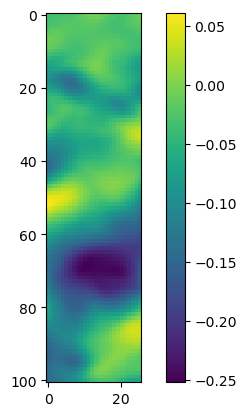

In [52]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data_first_day = np.array(water_u[10,0,:,:])
print(type(data_first_day))
#data_first_day[data_first_day == '--'] = np.nan
data_with_nan = np.where(data_first_day == -30000, np.nan, data_first_day)
#data_masked = np.ma.masked_where(data_first_day == '--', data_first_day)
plt.imshow(data_with_nan, interpolation = 'none')
plt.colorbar()

# 127037.86805555556 48.02107 -60.52054

In [59]:
import numpy as np

x, y = np.meshgrid(list(lon),list(lat)) 

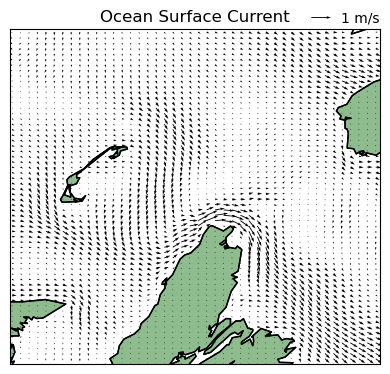

In [98]:
%matplotlib inline
import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

# setting the size of the map
fig,ax = plt.subplots(figsize=(4,4))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 1, urcrnrlat = 5, llcrnrlon = -25, urcrnrlon = -22, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')
m = Basemap(projection = 'mill', llcrnrlat = config['min_lat'], urcrnrlat = config['max_lat']-1.5, llcrnrlon = config['min_lon']+0.5, urcrnrlon = config['max_lon'], resolution = 'i') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)

Q = ax.quiver(x_, y_, water_u[3,0,:,:], water_v[3,0,:,:]) #, scale=20, width = 0.005) 
qk = ax.quiverkey(Q, X=0.84, Y=0.94, U=1,label=r'1 m/s', labelpos='E', coordinates = 'figure')



#m.drawmapscale(config['max_lon']-0.4, config['min_lat']+0.4, config['min_lon'], config['max_lat'], 50, barstyle='fancy')


#m.scatter(-60.5254,48.02107,latlon=True,c='r',marker='o')
#127037.86805555556 48.02107 -60.52054
#plt.legend(loc = 'lower right',framealpha=1)
plt.title('Ocean Surface Current')
plt.tight_layout()
plt.show()



In [101]:
lon = ds_wind.variables['longitude']
lon = lon[:].data
lat = ds_wind.variables['latitude']
lat = lat[:].data
u10 = ds_wind.variables['u10']
u10 = u10[:].data
v10 = ds_wind.variables['v10']
v10 = v10[:].data

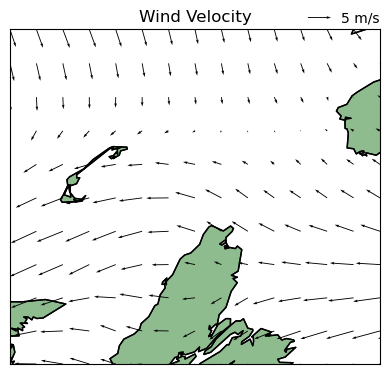

In [108]:
%matplotlib inline
import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

x, y = np.meshgrid(list(lon),list(lat))

# setting the size of the map
fig,ax = plt.subplots(figsize=(4,4))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 1, urcrnrlat = 5, llcrnrlon = -25, urcrnrlon = -22, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')
m = Basemap(projection = 'mill', llcrnrlat = config['min_lat'], urcrnrlat = config['max_lat']-1.5, llcrnrlon = config['min_lon']+0.5, urcrnrlon = config['max_lon'], resolution = 'i') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)

Q = ax.quiver(x_, y_, u10[3,:,:], v10[3,:,:], scale=80) #, width = 0.005) 
qk = ax.quiverkey(Q, X=0.84, Y=0.94, U=5,label=r'5 m/s', labelpos='E', coordinates = 'figure')

#m.drawmapscale(config['max_lon']-0.4, config['min_lat']+0.4, config['min_lon'], config['max_lat'], 50, barstyle='fancy')


#m.scatter(-60.5254,48.02107,latlon=True,c='r',marker='o')
#127037.86805555556 48.02107 -60.52054
#plt.legend(loc = 'lower right',framealpha=1)
plt.title('Wind Velocity')
plt.tight_layout()
plt.show()


In [111]:
lon = ds_stokes.variables['longitude']
lon = lon[:].data
lat = ds_stokes.variables['latitude']
lat = lat[:].data
ust = ds_stokes.variables['ust']
ust = ust[:].data
vst = ds_stokes.variables['vst']
vst = vst[:].data
ust = np.where(ust == -32767, 0, ust)
vst = np.where(vst == -32767, 0, vst)

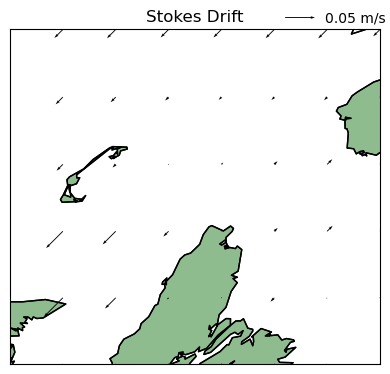

In [117]:
%matplotlib inline
import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

x, y = np.meshgrid(list(lon),list(lat))

# setting the size of the map
fig,ax = plt.subplots(figsize=(4,4))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 1, urcrnrlat = 5, llcrnrlon = -25, urcrnrlon = -22, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')
m = Basemap(projection = 'mill', llcrnrlat = config['min_lat'], urcrnrlat = config['max_lat']-1.5, llcrnrlon = config['min_lon']+0.5, urcrnrlon = config['max_lon'], resolution = 'i') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)

Q = ax.quiver(x_, y_, vst[3,:,:], vst[3,:,:]) #, scale=5) #, width = 0.005) 
qk = ax.quiverkey(Q, X=0.8, Y=0.94, U=0.05,label=r'0.05 m/s', labelpos='E', coordinates = 'figure')

#m.drawmapscale(config['max_lon']-0.4, config['min_lat']+0.4, config['min_lon'], config['max_lat'], 50, barstyle='fancy')


#m.scatter(-60.5254,48.02107,latlon=True,c='r',marker='o')
#127037.86805555556 48.02107 -60.52054
#plt.legend(loc = 'lower right',framealpha=1)
plt.title('Stokes Drift')
plt.tight_layout()
plt.show()


In [131]:
from utils.read_data import wind_interpolated
u10_interpolation, v10_interpolation = wind_interpolated(config['PATH_WIND'])

from utils.read_data import convert_hours_1900_2000

time = ds_wind.variables['time']
time = time[:].data
lon = ds_wind.variables['longitude']
lon = lon[:].data
lat = ds_wind.variables['latitude']
lat = lat[:].data

vfunc = np.vectorize(convert_hours_1900_2000) # convert time to fit the rest of the data
time_ok = vfunc(time)

lat_interp = np.linspace(40,60,200)
lon_interp = np.linspace(-65,-45,200)

lon_msh, lat_msh = np.meshgrid(lon_interp, lat_interp)

lon_msh, lat_msh = lon_msh.flatten(), lat_msh.flatten()

u10_interp = np.zeros(len(lon_msh))
v10_interp = np.zeros(len(lon_msh))

for i in range(len(lon_msh)):
    u10_interp[i] = u10_interpolation([time_ok[3], lat_msh[i], lon_msh[i]])
    v10_interp[i] = v10_interpolation([time_ok[3], lat_msh[i], lon_msh[i]])

In [121]:
from utils.read_data import wind_interpolated
water_u_interpolation, water_v_interpolation = wind_interpolated(config['PATH'])

KeyError: 'longitude'

In [124]:
lat_interp = np.linspace(47,50,80)
lon_interp = np.linspace(-57,-62,160)

lon_msh, lat_msh = np.meshgrid(lon_interp, lat_interp)

lon_msh, lat_msh = lon_msh.flatten(), lat_msh.flatten()

u10_interp = np.zeros(len(lon_msh))
v10_interp = np.zeros(len(lon_msh))

for i in range(len(lon_msh)):
    u10_interp[i] = water_u_interpolation([time[3],lat_msh[i], lon_msh[i]])
    v10_interp[i] = water_v_interpolation([time[3], lat_msh[i], lon_msh[i]])



ValueError: cannot reshape array of size 3 into shape (4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


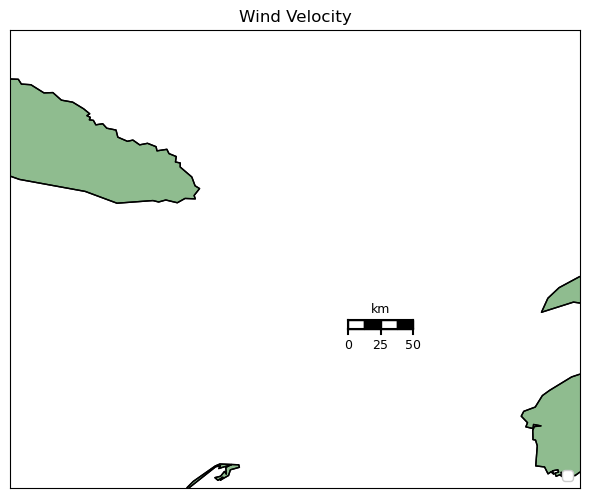

In [142]:
%matplotlib inline
import matplotlib
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

x, y = np.meshgrid(list(lon),list(lat))

# setting the size of the map
fig,ax = plt.subplots(figsize=(6,6))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 1, urcrnrlat = 5, llcrnrlon = -25, urcrnrlon = -22, resolution = 'i') 
#m = Basemap(projection = 'mill', llcrnrlat = 45.5, urcrnrlat = 47.58, llcrnrlon = -63.8, urcrnrlon = -60.9, resolution = 'i')
m = Basemap(projection = 'mill', llcrnrlat = config['min_lat']+1.5, urcrnrlat = config['max_lat'], llcrnrlon = config['min_lon'], urcrnrlon = config['max_lon'], resolution = 'i') 

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)
x_interp,y_interp = m(lon_msh,lat_msh)

'''Q = ax.quiver(x_, y_, u10[3,:,:], v10[3,:,:], scale=80, width = 0.005, color='crimson', label='True vector field') #, width = 0.005) 
Q2 = ax.quiver(x_interp,y_interp, u10_interp, v10_interp, scale=100, width = 0.002, color='k', label='Interpolated vector field')

qk = ax.quiverkey(Q, X=0.87, Y=0.9, U=5,label=r'5 m/s', labelpos='E', coordinates = 'figure')

'''
#Q = ax.quiver(x_, y_, u10[245,:,:], v10[245,:,:], scale=100, width = 0.005, color='crimson', label='True vector field') 
#Q2 = ax.quiver(x_interp,y_interp, u10_interp, v10_interp, scale=100, width = 0.002, color='k', label='Interpolated vector field')


m.drawmapscale(config['max_lon']-1.4, config['min_lat']+2.4, config['min_lon'], config['max_lat'], 50, barstyle='fancy')


#m.scatter(-60.5254,48.02107,latlon=True,c='r',marker='o')
#127037.86805555556 48.02107 -60.52054
plt.legend(loc = 'lower right',framealpha=1)
plt.title('Wind Velocity')
plt.tight_layout()
plt.show()


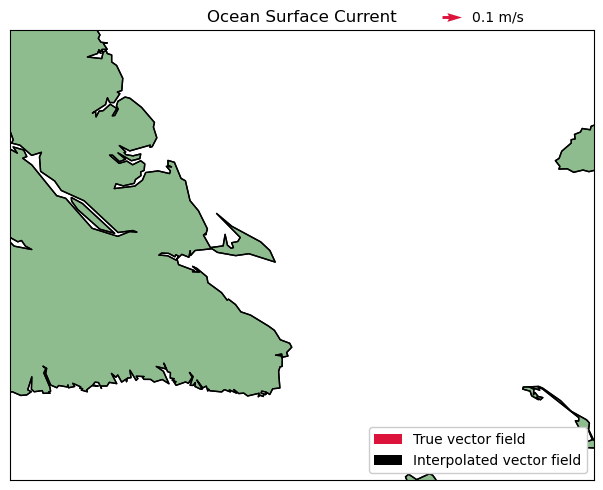

In [17]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# setting the size of the map
fig,ax = plt.subplots(figsize=(8,5))

# creating the map - setting latitude and longitude
#m = Basemap(projection = 'mill', llcrnrlat = 44, urcrnrlat = 52, llcrnrlon = -74, urcrnrlon = -53, resolution = 'i') 
m = Basemap(projection = 'mill', llcrnrlat = 47, urcrnrlat = 50, llcrnrlon = -57, urcrnrlon = -62, resolution = 'i')

# drawing the coastline
m.drawcoastlines()
#m.drawcountries(color='yellowgreen')
#m.drawstates(color='yellowgreen')
m.drawcoastlines()
m.fillcontinents(color='darkseagreen')

x_,y_ = m(x,y)
x_interp,y_interp = m(lon_msh,lat_msh)


Q = ax.quiver(x_, y_, water_u[3,0,:,:], water_v[3,0,:,:], scale=3, width = 0.005,color='crimson', label='True vector field') 
Q2 = ax.quiver(x_interp,y_interp, u10_interp, v10_interp, scale=3, width = 0.002, color='k', label='Interpolated vector field')

qk = ax.quiverkey(Q, X=0.7, Y=0.955, U=0.1,label=r'0.1 m/s', labelpos='E', coordinates = 'figure')

plt.legend(loc = 'lower right',framealpha=1)

plt.title('Ocean Surface Current')
plt.tight_layout()
plt.show()
